In [ ]:
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
from nmf_son.utils import load_results

np.random.seed(42)
np.set_printoptions(precision=3)

In [ ]:
X = np.load('../datasets/urban_small.npz')['X']
rank = 6

data = np.load(f'../saved_models/urban_small_r{rank}_ini.npz')
ini_W = data['W']
ini_H = data['H']

In [ ]:
def plot_scores(fscores, gscores, lambda_vals, plot_title):
    #removing initial f,g, total
    fscores = fscores[1:]
    gscores = gscores[1:]
    lambda_vals = lambda_vals[1:]

    def plot_ax(ax, f, g, total):
        ax.plot(total, color='black', linewidth=3, label='$F(W, H)$')
        ax.plot(f, color='cyan', linewidth=1.5, label='$f(W, H)$')
        ax.plot(g, color='yellow', linewidth=1.5, label='$g(W)$')
        ax.legend()

    total_score = fscores + lambda_vals * gscores
    fig, axs = plt.subplots(2, 1, figsize=(5, 10))


    fig.suptitle(plot_title, fontsize=20)

    axs[0].set_yscale('log')
    plot_ax(axs[0], fscores, gscores, total_score)
    axs[0].set_title('log scale', fontsize=16)

    axs[1].set_yscale('log')
    plot_ax(axs[1], fscores - fscores[-1], gscores - gscores[-1], total_score - total_score[-1])
    axs[1].set_title('log(score - score*)', fontsize=16)

def plot__multi_scores(comp_vers, fscore_arr, gscore_arr, lambda_val_arr, plot_title=None):
    def plot_ax(ax, f, g, total):
        ax.plot(total, color='black', linewidth=3)
        ax.plot(f, color='cyan', linewidth=1.5)
        ax.plot(g, color='yellow', linewidth=1.5)
        ax.legend(['F', 'f', 'g'])    #removing initial f,g, total

    no_vers = len(comp_vers)
    fig, axs = plt.subplots(2, no_vers, figsize=(5 * no_vers, 10))
    if plot_title:
        fig.suptitle(plot_title, fontsize=20)

    for ver in range(no_vers):
        fscores = fscore_arr[ver][1:]
        gscores = gscore_arr[ver][1:]
        lambda_vals = lambda_val_arr[ver][1:]
        total_score = fscores + lambda_vals * gscores

        axs[0, ver].set_yscale('log')
        plot_ax(axs[0, ver], fscores, gscores, total_score)
        axs[0, ver].set_title('log scale', fontsize=16)

        axs[1, ver].set_yscale('log')
        plot_ax(axs[1, ver], fscores - min(fscores), gscores - min(gscores), total_score - min(total_score))
        axs[1, ver].set_title('log(score - score*)', fontsize=16)

def plot_images(H, img_size, comparison_idxs):
    fig, axs = plt.subplots(1, len(comparison_idxs), figsize=(20, 10))

    for i, idx in enumerate(comparison_idxs):
        h_idx_3d = H[idx, :].reshape(img_size, order='F')

        axs[i].imshow(h_idx_3d)
        img = axs[i].imshow(h_idx_3d, cmap='gray')
        divider = make_axes_locatable(axs[i])

        cax = divider.append_axes('right', size='5%', pad=0.1)
        fig.colorbar(img, cax=cax, orientation='vertical')
        axs[i].set_title(f'H({idx+1})')

In [ ]:
comp_idxs = range(rank)
img_size = (20, 10)

In [34]:
def plot_matrices(W, H, img_size, comparison_idxs, filename=None):
    fig, axs = plt.subplots(2, len(comparison_idxs), figsize=(20, 10), sharey='row', sharex='row')

    for i, idx in enumerate(comparison_idxs):
        axs[0, i].plot(W[:, idx])
        axs[0, i].set_title(f'$W_{idx+1}$')

        h_idx_3d = H[idx, :].reshape(img_size, order='F')
        axs[1, i].imshow(h_idx_3d)
        img = axs[1, i].imshow(h_idx_3d, cmap='gray')
        divider = make_axes_locatable(axs[1, i])

        cax = divider.append_axes('right', size='5%', pad=0.1)
        fig.colorbar(img, cax=cax, orientation='vertical')
        axs[1, i].set_title(f'$H_{idx+1}$')
    if filename:
        fig.savefig(filename)


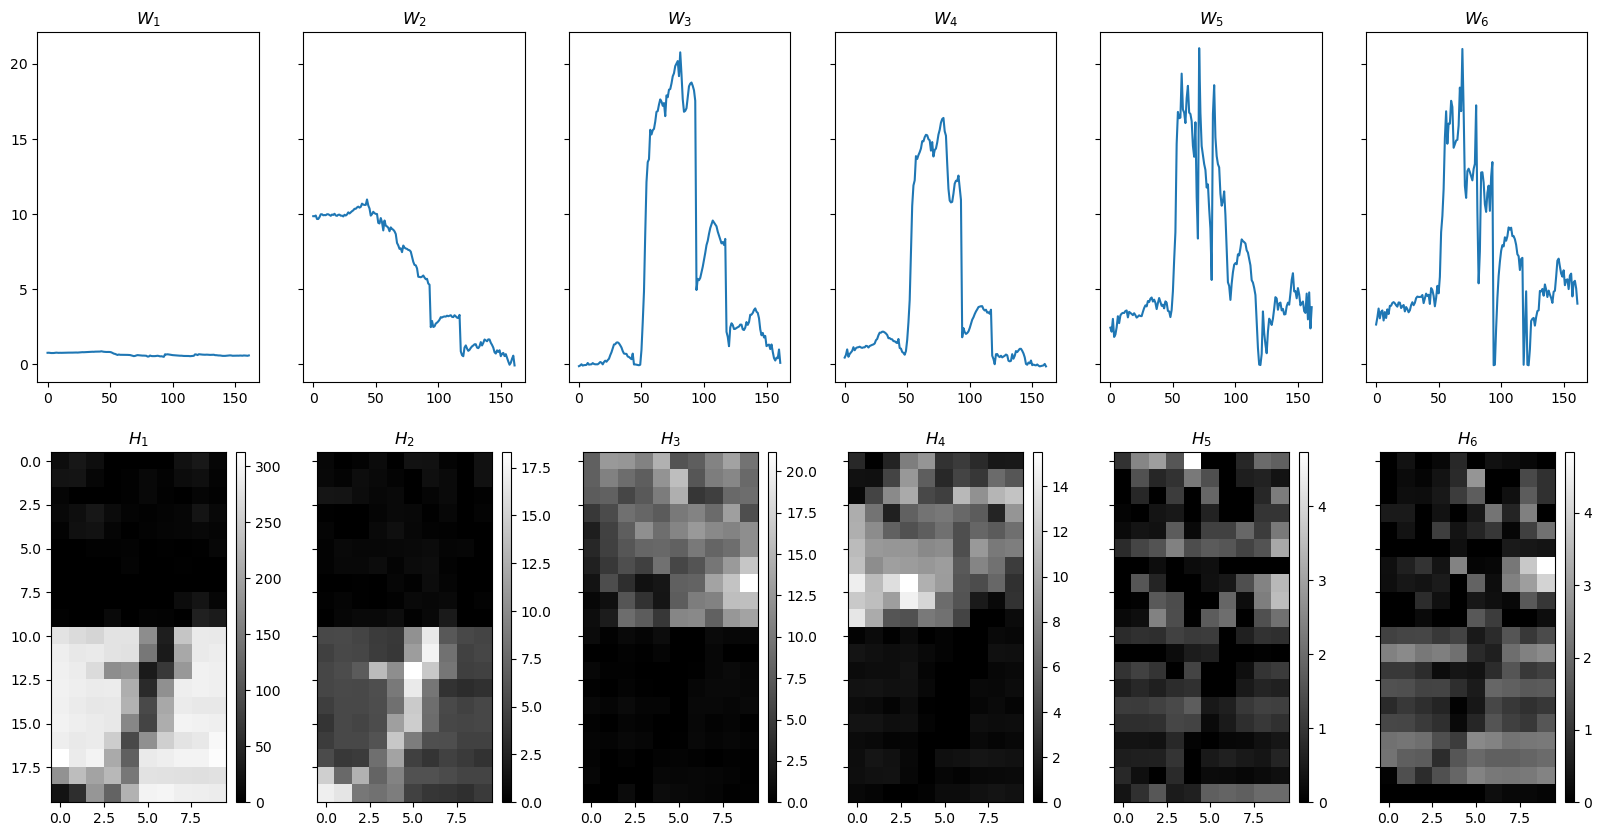

In [35]:
Wb, Hb, Wl, Hl, fscores, gscores, lambda_vals = load_results('../saved_models/urban_small_tuning/r6_l2.npz')
plot_matrices(Wl, Hl, img_size, comp_idxs, 'urban_small_r6_l2.png')


/Users/waqas/opt/anaconda3/envs/seminmf/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 3000 reached. Increase it to improve convergence.
  warnings.warn(


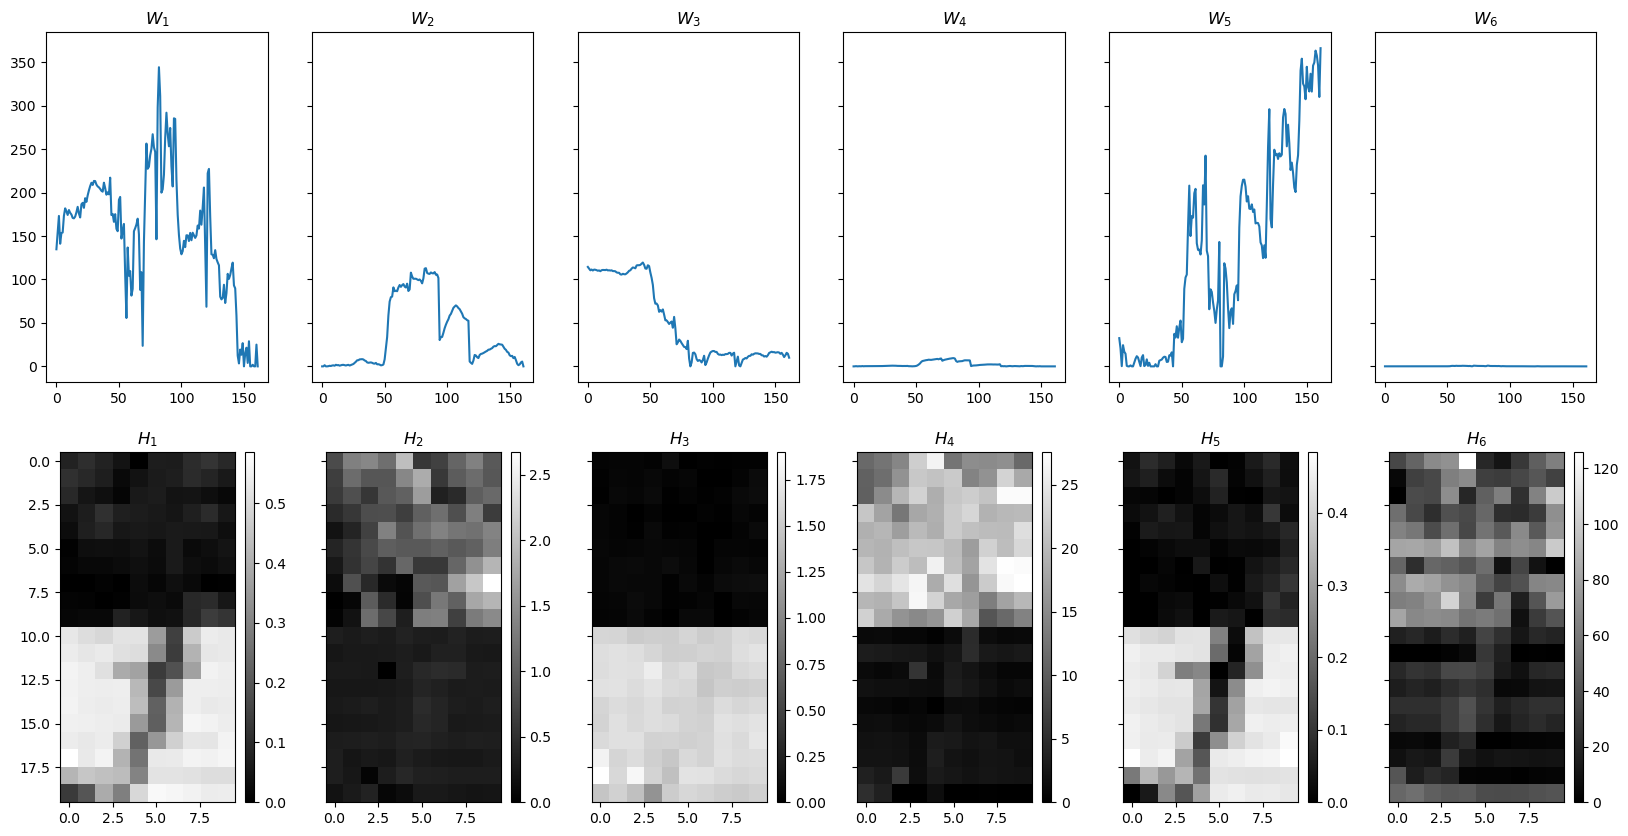

In [36]:
model = NMF(n_components=rank, init='custom', random_state=42, tol=1e-5, max_iter=3000)
vanillaW = model.fit_transform(X=X, W=ini_W.copy(), H=ini_H.copy())
vanillaH = model.components_
plot_matrices(vanillaW, vanillaH, img_size, comp_idxs, 'urban_small_r6_vanilla.png')


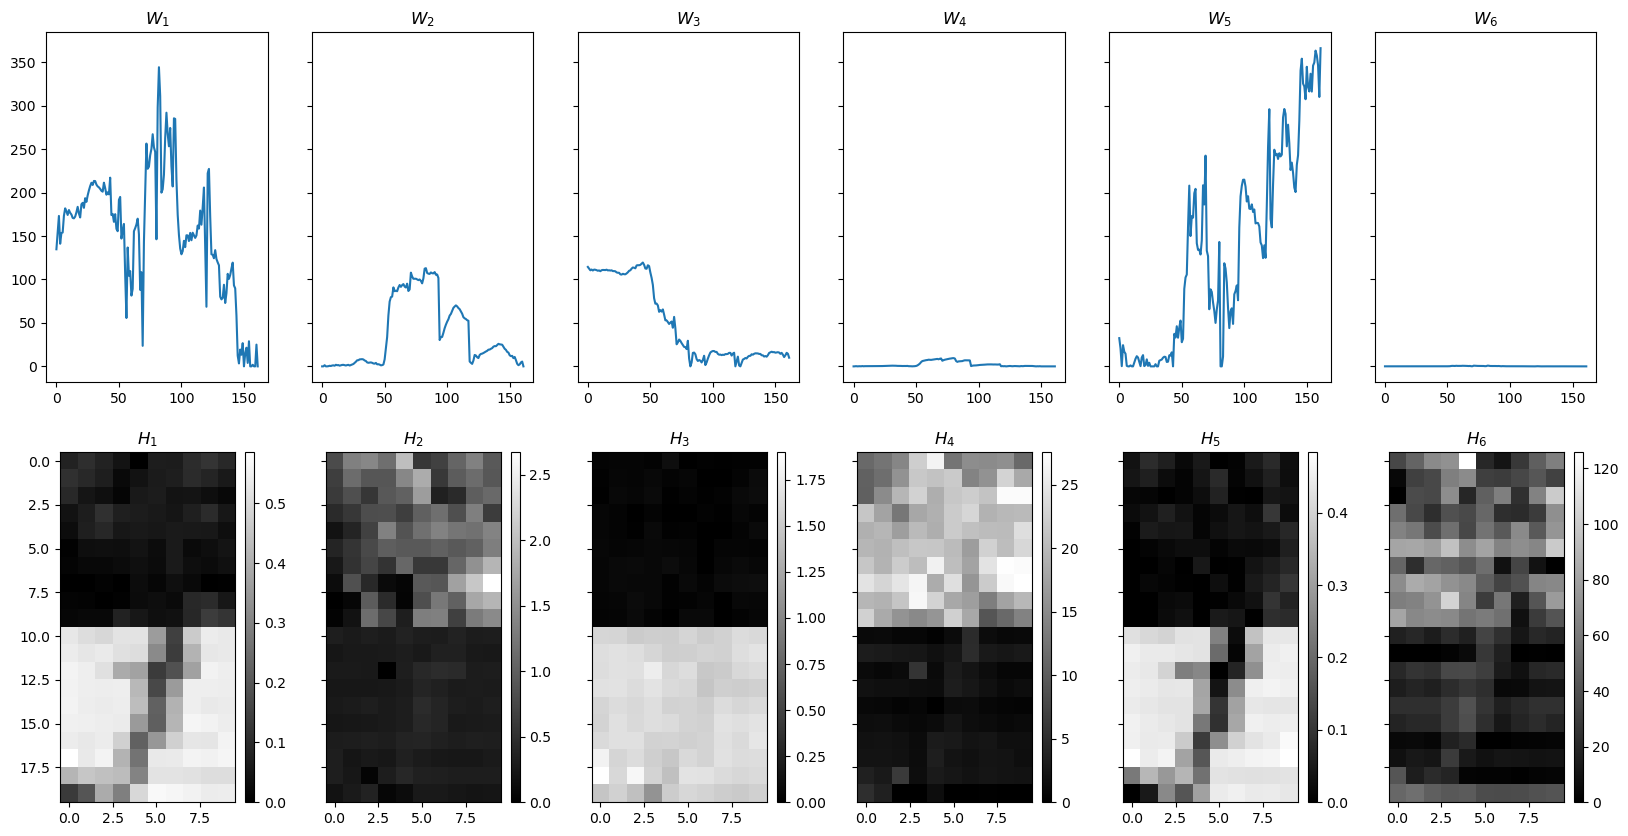

In [28]:
plot_matrices(vanillaW, vanillaH, img_size, comp_idxs)
# plot_images(vanillaH, img_size, comp_idxs)